# Linear Regression Consulting Project

Congratulations! You've been contracted by Hyundai Heavy Industries to help them build a predictive model for some ships. [Hyundai Heavy Industries](http://www.hyundai.eu/en) is one of the world's largest ship manufacturing companies and builds cruise liners.

You've been flown to their headquarters in Ulsan, South Korea to help them give accurate estimates of how many crew members a ship will require.

They are currently building new ships for some customers and want you to create a model and **use it to predict how many crew members the ships will need.**

Here is what the data looks like so far:

    Description: Measurements of ship size, capacity, crew, and age for 158 cruise
    ships.


    Variables/Columns
    Ship Name     1-20
    Cruise Line   21-40
    Age (as of 2013)   46-48
    Tonnage (1000s of tons)   50-56
    passengers (100s)   58-64
    Length (100s of feet)  66-72
    Cabins  (100s)   74-80
    Passenger Density   82-88
    Crew  (100s)   90-96
    
It is saved in a csv file for you called "cruise_ship_info.csv". Your job is to create a regression model that will help predict how many crew members will be needed for future ships. The client also mentioned that they have found that particular cruise lines will differ in acceptable crew counts, so it is most likely an important feature to include in your analysis! 

Once you've created the model and tested it for a quick check on how well you can expect it to perform, make sure you take a look at why it performs so well!

목적 :  일부 선박의 예측 모델을 구축 할 수 있습니다. 

한국 울산에있는 본부로 이동하여 선박에 필요한 승무원 수를 정확하게 추정 할 수 있습니다.

현재 일부 고객을 위해 새로운 선박을 제작하고 있으며 모델을 생성하고 

**선박에 필요한 승무원 수를 예측하는 데 사용하기를 원합니다.**

In [61]:
import pandas as pd 
import random as rd

df = pd.read_csv('./cruise_ship_info.csv')

# 데이터 모양

설명 : 158 크루즈의 선박 크기, 용량, 승무원 및 연령 측정


## 변수 / 열(Variables/Columns)



- 선박 이름(Ship Name) 1-20

- 크루즈 라인(Cruise Line) 21-40

- 연령(Age) (2013 년 기준) 46-48 # 배나이

- 톤수(Tonnage) (1000 톤) 50-56

- 승객(passengers) (100 대) 58-64

- 길이(Length) (100s) 66-72

- 캐빈(Cabins) (100) 74-80

- 여객 밀도(Passenger) 82-88

- 승무원 (100 대)(Crew:100s) 90-96



기준은 승무원 수 !

In [62]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [63]:
df['Cruise_line'].value_counts()

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Seabourn              3
Windstar              3
Cunard                3
Oceania               3
Crystal               2
Azamara               2
Disney                2
Orient                1
Name: Cruise_line, dtype: int64

In [64]:
df.iloc[:,:2]

,Ship_name,Cruise_line
0,Journey,Azamara
1,Quest,Azamara
2,Celebration,Carnival
3,Conquest,Carnival
4,Destiny,Carnival
...,...,...
153,Taurus,Star
154,Virgo,Star
155,Spirit,Windstar
156,Star,Windstar


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [66]:
import matplotlib.pyplot as plt   # 맷폴렛- 그래프
import seaborn as sns
# ignore warnings
import warnings    # 워닝 방지
warnings.filterwarnings('ignore')

%matplotlib inline

In [67]:
# 통계치 확인  

df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [68]:
# 결측치는 없고 
df.isnull().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

In [69]:
df.columns ,len(df.columns)

(Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
        'cabins', 'passenger_density', 'crew'],
       dtype='object'),
 9)

In [70]:
df.shape

(158, 9)

In [71]:
crew_cnt = df['crew'].value_counts()

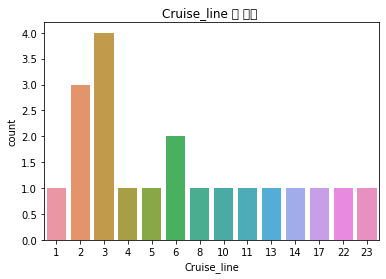

In [72]:
sns.countplot(df['Cruise_line'].value_counts(), data=df)
plt.title("Cruise_line 당 개수 ")
plt.show()

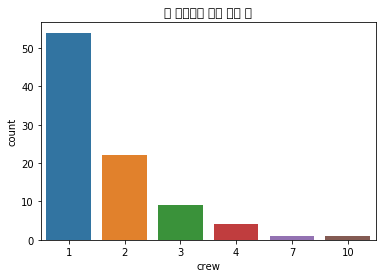

In [73]:
sns.countplot(df['crew'].value_counts(), data=df)
plt.title("각 크루즈당 평균 선원 수")
plt.show()

In [74]:
# 그룹화 해서 평균 
df_passengers= df[['crew','passengers']].groupby(['crew'], as_index=True)
df_passengers.mean()

,passengers
crew,
0.59,0.660000
0.60,0.940000
0.88,1.625000
1.46,3.940000
1.60,2.080000
...,...
13.00,19.560000
13.13,39.590000
13.60,41.246667


In [75]:
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

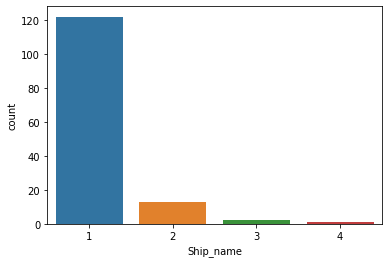

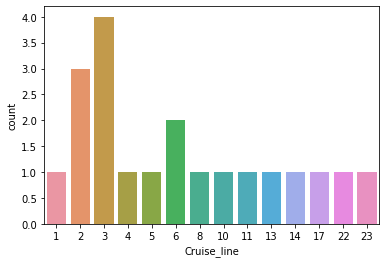

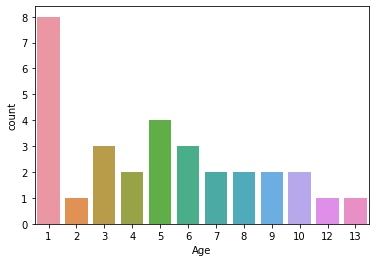

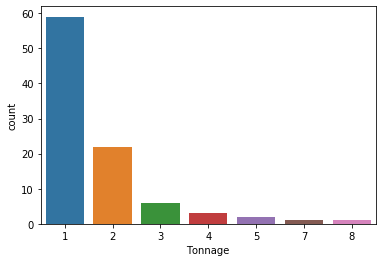

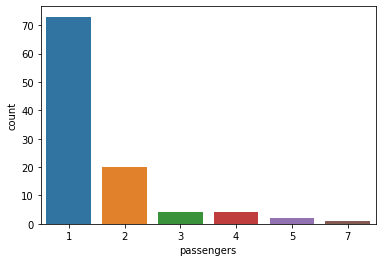

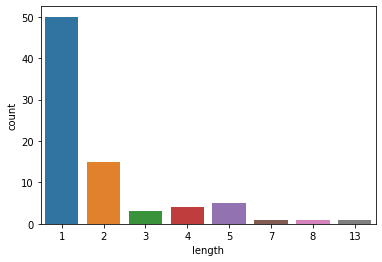

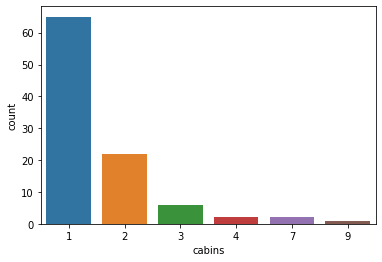

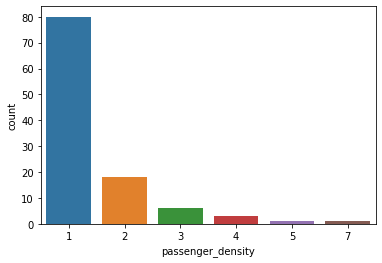

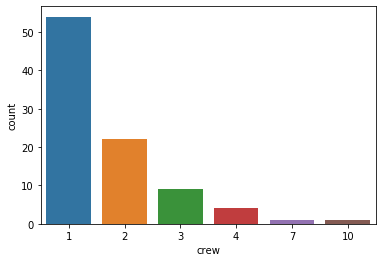

In [76]:
for col in  df.columns: 
    sns.countplot(df[col].value_counts(), data=df)
    plt.show()
#     print(col)

Spirit     4
Legend     3
Star       3
Sun        2
Jewel      2
          ..
Veendam    1
Century    1
Oriana     1
Musica     1
Fortuna    1
Name: Ship_name, Length: 138, dtype: int64


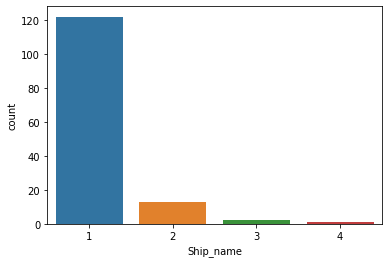

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Seabourn              3
Windstar              3
Cunard                3
Oceania               3
Crystal               2
Azamara               2
Disney                2
Orient                1
Name: Cruise_line, dtype: int64


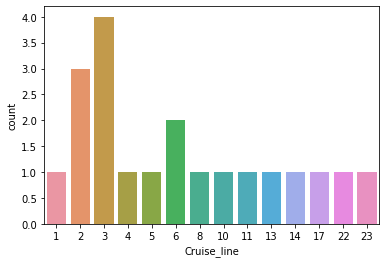

12    13
10    12
11    10
9     10
13     9
14     9
15     8
6      8
17     7
21     7
16     6
22     6
18     6
27     5
25     5
20     5
5      5
19     4
23     4
8      3
29     3
7      3
24     2
48     1
44     1
26     1
28     1
31     1
36     1
40     1
4      1
Name: Age, dtype: int64


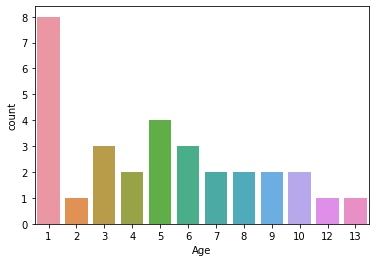

70.367     8
30.277     7
91.000     5
138.000    5
90.090     4
          ..
108.977    1
47.262     1
101.353    1
40.053     1
59.652     1
Name: Tonnage, Length: 94, dtype: int64


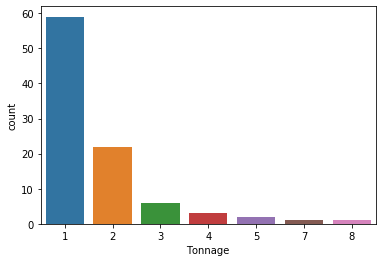

20.52    7
19.50    5
31.14    5
29.74    4
20.32    4
        ..
20.76    1
13.44    1
19.28    1
9.52     1
37.00    1
Name: passengers, Length: 104, dtype: int64


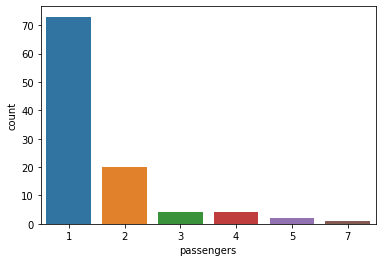

9.51    13
8.55     8
9.65     7
9.64     5
9.63     5
        ..
7.04     1
6.92     1
7.90     1
9.36     1
9.00     1
Name: length, Length: 80, dtype: int64


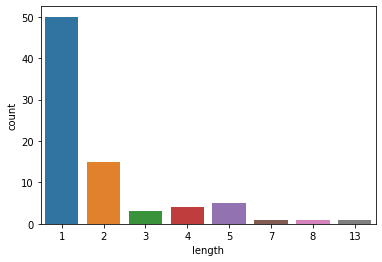

9.75     9
15.57    7
10.20    7
14.87    4
10.50    4
        ..
7.95     1
6.54     1
9.67     1
3.83     1
6.32     1
Name: cabins, Length: 98, dtype: int64


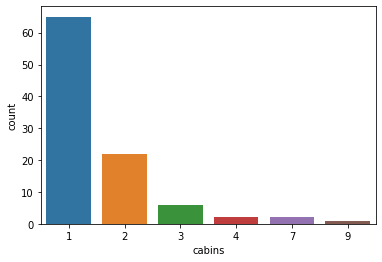

34.29    7
44.32    5
36.02    4
36.99    4
44.78    4
        ..
32.56    1
38.36    1
29.88    1
40.65    1
40.50    1
Name: passenger_density, Length: 109, dtype: int64


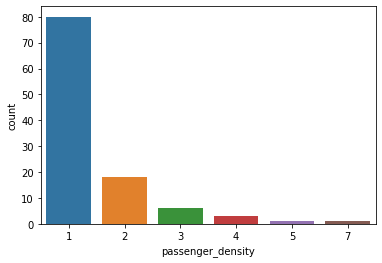

9.20     10
9.00      7
9.99      4
4.00      4
12.00     4
         ..
9.59      1
3.85      1
1.97      1
9.87      1
6.12      1
Name: crew, Length: 91, dtype: int64


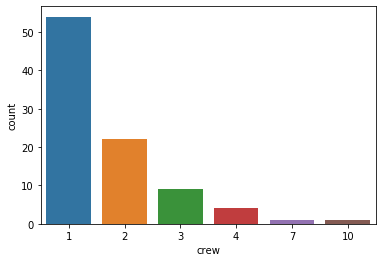

In [77]:
for col in  df.columns: 
    sns.countplot(df[col].value_counts(), data=df)
    print(df[col].value_counts())
    print('='*50)
    plt.show()
#     print(col)

In [78]:
# for col in  df.columns: 
#     print(df[col].value_counts())
#     print('='*50)
# #     print(col)

In [79]:
#  df['Cruise_line'].value_counts()

In [80]:
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [81]:
# df[['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
#        'cabins', 'passenger_density', 'crew']] 

In [82]:
df_= df

In [83]:
df['crew']

0       3.55
1       3.55
2       6.70
3      19.10
4      10.00
       ...  
153     0.59
154    12.00
155     0.88
156     0.88
157     1.80
Name: crew, Length: 158, dtype: float64

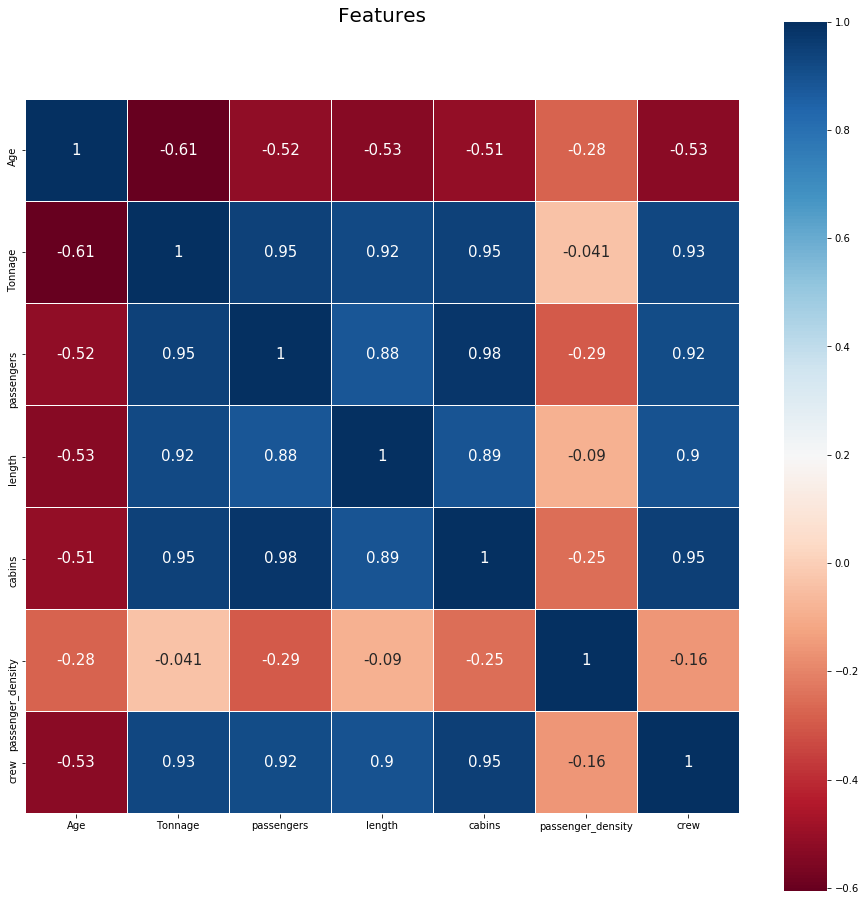

In [84]:
# 필요 특징만 꺼내서 진행 - 1차
heatmap_data = df[['Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(16, 16))
plt.title('Features', y=1.1, size=20)

sns.heatmap( heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 15})


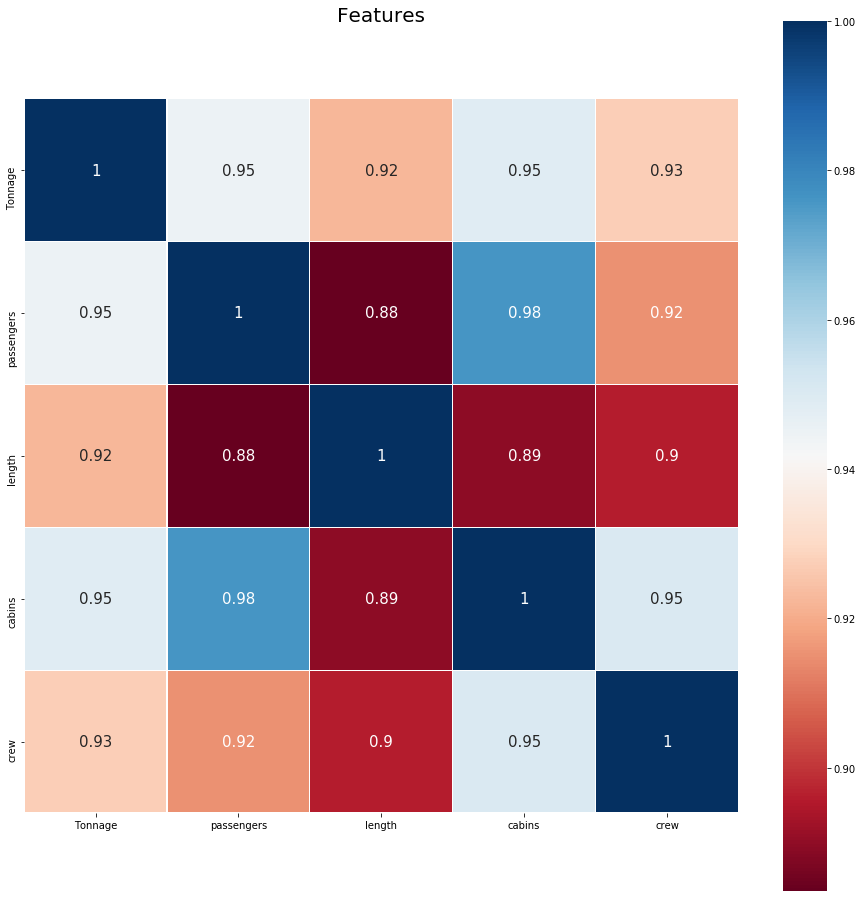

In [85]:
# 필요 특징만 꺼내서 진행 
heatmap_data = df[['Tonnage', 'passengers', 'length',
       'cabins', 'crew']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(16, 16))
plt.title('Features', y=1.1, size=20)

sns.heatmap( heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 15})


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
df_d = df[['Tonnage', 'passengers', 'length','cabins']]

In [88]:
df_t= df[['crew']]

In [89]:
# df_d = pd.get_dummies(df_d, columns=['Ship_name'], prefix='Ship_name')
# df_d.head()

In [90]:
# df_d = pd.get_dummies(df_d, columns=['Cruise_line'], prefix='Cruise_line')
# df_d.head()

In [91]:
df_tmp = df[['Ship_name','Cruise_line','Tonnage', 'passengers', 'length','cabins','crew']]

In [92]:
df_tmp

,Ship_name,Cruise_line,Tonnage,passengers,length,cabins,crew
0,Journey,Azamara,30.277,6.94,5.94,3.55,3.55
1,Quest,Azamara,30.277,6.94,5.94,3.55,3.55
2,Celebration,Carnival,47.262,14.86,7.22,7.43,6.70
3,Conquest,Carnival,110.000,29.74,9.53,14.88,19.10
4,Destiny,Carnival,101.353,26.42,8.92,13.21,10.00
...,...,...,...,...,...,...,...
153,Taurus,Star,3.341,0.66,2.79,0.33,0.59
154,Virgo,Star,76.800,19.60,8.79,9.67,12.00
155,Spirit,Windstar,5.350,1.58,4.40,0.74,0.88
156,Star,Windstar,5.350,1.67,4.40,0.74,0.88


In [93]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ship_name    158 non-null    object 
 1   Cruise_line  158 non-null    object 
 2   Tonnage      158 non-null    float64
 3   passengers   158 non-null    float64
 4   length       158 non-null    float64
 5   cabins       158 non-null    float64
 6   crew         158 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.8+ KB


In [94]:
# df_tmp = pd.get_dummies(df_tmp, columns=['Ship_name'], prefix='Ship_name')

In [95]:
# a = df_tmp.iloc[:,1:]
# a.dtypes

In [96]:
# # 필요 특징만 꺼내서 진행 
# heatmap_data = a

# colormap = plt.cm.RdBu
# plt.figure(figsize=(100, 100))
# plt.title('Features', y=1.1, size=60)

# sns.heatmap( heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
#            square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 10})


In [97]:
# df_tmp = pd.get_dummies(df_tmp, columns=['Cruise_line'], prefix='Cruise_line')
# df_tmp = pd.get_dummies(df_tmp, columns=['Ship_name'], prefix='Ship_name')
# df_tmp.head()

In [98]:
# df_tmp.iloc[:,5:].dtypes

In [99]:
# df_tmp.dtypes

In [100]:
# df_tmp = df[['Ship_name','Cruise_line','Tonnage', 'passengers', 'length','cabins','crew']]

In [101]:
print(df_tmp.dtypes)

Ship_name       object
Cruise_line     object
Tonnage        float64
passengers     float64
length         float64
cabins         float64
crew           float64
dtype: object


In [102]:
# # 필요 특징만 꺼내서 진행 
# heatmap_data = df_tmp

# colormap = plt.cm.RdBu
# plt.figure(figsize=(16, 16))
# plt.title('Features', y=1.1, size=20)

# sns.heatmap( heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
#            square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 15})


In [103]:
# x_train, x_test, y_train, y_test = train_test_split(df_d, df_t, test_size=0.3, random_state=777)

In [104]:
# x_train.shape, x_test.shape, y_train.shape, y_test.shape 

In [105]:
# x_train, x_test, y_train, y_test 

In [106]:
# test_1 = pd.get_dummies(df, columns=['Ship_name'], prefix='Ship_name')
# test_1.head()

In [107]:
# test_2 = pd.get_dummies(df, columns=['Cruise_line'], prefix='Cruise_line')
# test_2.head()

In [108]:
# importing all the requested ML packages
from sklearn.ensemble import RandomForestClassifier  # 랜덤포레스트
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수
from sklearn import metrics  

# 모델 생성 및 예측 

In [109]:
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

In [119]:
scaler = StandardScaler()
scaler_columns =  [
        'Tonnage', 'passengers', 'length','cabins']
df[scaler_columns] = scaler.fit_transform(df[scaler_columns])

In [120]:
X = df[scaler_columns]
y = df['crew']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

In [122]:
# 표준화 함수 정의
sc = preprocessing.StandardScaler()
# 데이터를 표준화
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [123]:
clf_ = linear_model.LinearRegression(normalize=False) 
# clf_ = linear_model.Ridge(alpha=.5)
# clf_ = linear_model.LassoLars(alpha=.1) 
# clf_ = RANSACRegressor(random_state=None) 
# clf_ = KNeighborsRegressor(n_neighbors=5) # 15 
# clf_ = linear_model.Lasso(alpha=0.1,max_iter=5000)

In [125]:
clf_.fit(X_train, y_train)
y_pred  = clf_.predict(X_test)

In [129]:
# # LinearRegression
clf_ = linear_model.LinearRegression(normalize=False) 
# print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
# print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
# print("train 학습 정확도 :", clf_.score(X_train, y_train)) 
# print("test 학습 정확도 :", clf_.score(X_test, y_test))


In [ ]:
y_train.dtypes

In [ ]:
x_train.dtypes

In [ ]:
x_train.dtypes, x_test.dtypes, y_train.dtypes, y_test.dtypes 

In [ ]:
# 모델 생성 
model = RandomForestClassifier()
model.fit(x_train, y_train)
# 예측 
# prediction = model.predict(x_test)